QUESTION 1: AUTOENCODER

In [3]:
import keras
from keras import layers
from matplotlib import pyplot
import numpy as np

In [8]:
# This is the size of our encoded representations
encoding_dim = 32
# This is our input image. 3072 -- (32,32,3)
input_img = keras.Input(shape=(3072,))
# "encoded" is the encoded representation of the input

# Pick an activation function and other parameters in the dense layer function...

encoded = layers.Dense(encoding_dim, activation='relu',use_bias=True,kernel_initializer="glorot_uniform")(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(3072, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [9]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [10]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [11]:
#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the "adadelta" optimizer:
#There are different types of optimizers such as "sgd", "adadelta", "adam", "RMSprop()"...etc. We will use "adadelta"
#For more information about the optimization, use this.
#https://ruder.io/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [12]:
from keras.datasets import cifar10

170500096/170498071 [==============================] - 11s 0us/step


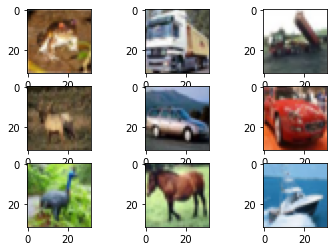

In [13]:
#(trainX, trainy), (testX, testy) = cifar10.load_data()
(x_train, _), (x_test, _) = cifar10.load_data()
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

In [14]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [15]:
# epochs = 10, and batch size = 256 per iteration
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 2/10
196/196 [==============================] - 6s 31ms/step - loss: 0.6936 - val_loss: 0.6936
Epoch 3/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6936 - val_loss: 0.6936
Epoch 4/10
196/196 [==============================] - 6s 31ms/step - loss: 0.6936 - val_loss: 0.6936
Epoch 5/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6936 - val_loss: 0.6936
Epoch 6/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6936 - val_loss: 0.6936
Epoch 7/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 8/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 9/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 10/10
196/196 [==============================] - 6s 32ms/step - loss: 0.6935 - val_lo

In [17]:
# Encode and decode some images
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

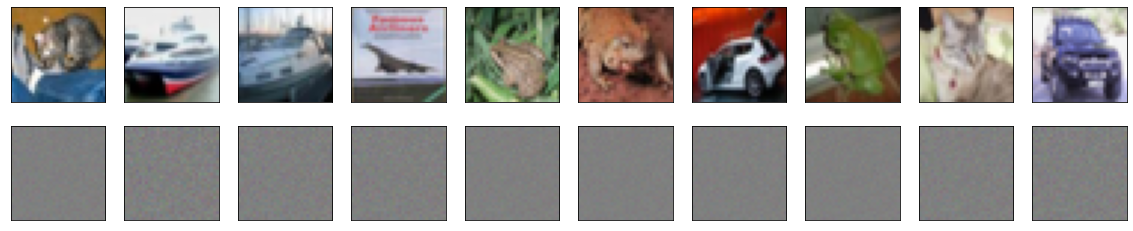

In [18]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

QUESTION 2.1

In [19]:
# Description: 

# I am constructing a deep CNN with 3 hidden layers using 2D convolution layers. 
# 4 by 4 maxpooling layer and a 0.1 dropout regularization. 
# The two convolution layers' outputs are passed to a flatten layer, the dense layer with 64 units, a 0.3 dropout regularization. 
# A softmax output layer which predicts 10 categories. 
# No padding is used here. The 2D convolution layers both have  3 by 3 kernels with a stride of 1.


import numpy as np
import keras
from keras import layers
from keras import models
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [20]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [21]:
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Dropout(0.1))

In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0

In [24]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
782/782 [==============================] - 39s 50ms/step - loss: 2.0044 - accuracy: 0.2456
Epoch 2/10
782/782 [==============================] - 39s 49ms/step - loss: 1.7461 - accuracy: 0.3443
Epoch 3/10
782/782 [==============================] - 38s 49ms/step - loss: 1.6343 - accuracy: 0.3969
Epoch 4/10
782/782 [==============================] - 38s 49ms/step - loss: 1.5718 - accuracy: 0.4234
Epoch 5/10
782/782 [==============================] - 38s 49ms/step - loss: 1.5257 - accuracy: 0.4467
Epoch 6/10
782/782 [==============================] - 38s 49ms/step - loss: 1.4901 - accuracy: 0.4592
Epoch 7/10
782/782 [==============================] - 38s 49ms/step - loss: 1.4548 - accuracy: 0.4747
Epoch 8/10
782/782 [==============================] - 38s 49ms/step - loss: 1.4292 - accuracy: 0.4841
Epoch 9/10
782/782 [==============================] - 39s 49ms/step - loss: 1.4052 - accuracy: 0.4966
Epoch 10/10
782/782 [==============================] - 38s 48ms/step - loss: 1.390

In [26]:
# Model accuracy on the training set is:
score_train = model.evaluate(train_images, train_labels, verbose=0)
print(score_train[1])


0.3921000063419342


In [27]:
# Model accuracy on the testing set is:
score_test = model.evaluate(test_images, test_labels, verbose=0)
print(score_test[1])

0.38040000200271606


QUESTION 2.2

In [29]:
# Transfer Learning
# Using ResNet50 --- I can use other options too like VGG, etc.
from keras.applications import ResNet50


In [30]:
conv_base = ResNet50(weights ='imagenet', include_top = False, input_shape=(32,32,3))
conv_base.summary()

94773248/94765736 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
__________________________

In [32]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = False


In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                131136    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 23,719,498
Trainable params: 131,786
Non-trainable params: 23,587,712
_________________________________________________________________


In [34]:
train_images.shape

(50000, 32, 32, 3)

In [35]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 169s 216ms/step - loss: 2.3066 - accuracy: 0.1022
Epoch 2/5
782/782 [==============================] - 169s 216ms/step - loss: 2.2699 - accuracy: 0.1328
Epoch 3/5
782/782 [==============================] - 171s 219ms/step - loss: 2.2281 - accuracy: 0.1456
Epoch 4/5
782/782 [==============================] - 167s 213ms/step - loss: 2.1865 - accuracy: 0.1544
Epoch 5/5
782/782 [==============================] - 166s 212ms/step - loss: 2.1683 - accuracy: 0.1613


In [36]:
# Model accuracy on the training set is:
score_train = model.evaluate(train_images, train_labels, verbose=0)
print(score_train[1])

# Model accuracy on the testing set is:
score_test = model.evaluate(test_images, test_labels, verbose=0)
print(score_test[1])



0.16529999673366547
0.16740000247955322


QUESTION 3.1

In [114]:
# For this question, I am using SimpleRNN:
##########################################
import os
import numpy as np
import pandas as pd

import nltk

from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import TensorBoard, ModelCheckpoint

import matplotlib.pyplot as plt
from IPython.display import SVG, display

# -- ROC libs --
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [115]:
data = pd.read_csv('SPAM_detection.csv')

In [116]:
data.head()

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [117]:
data.shape

(5572, 2)

In [118]:
texts = data['Message']
labels = data['category_val']

In [119]:
print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [120]:
# number of words used as features
max_features = 10000
maxlen = 500
# cut off the words after seeing 500 words in each document(email)
tokenizer = Tokenizer()

tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

Found 9004 unique words: 
data shape:  (5572, 500)


In [121]:


# split the data into train and test set ---- 80% training - 20% testing
#train, test = train_test_split(text_data, test_size=0.2, random_state=42, shuffle=True)

# split into train test sets
#X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.20)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)

texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

In [122]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 7s 111ms/step - loss: 0.3848 - acc: 0.8738 - val_loss: 0.1669 - val_acc: 0.9619
Epoch 2/10
60/60 [==============================] - 6s 96ms/step - loss: 0.1150 - acc: 0.9708 - val_loss: 0.0884 - val_acc: 0.9787
Epoch 3/10
60/60 [==============================] - 6s 94ms/step - loss: 0.1371 - acc: 0.9484 - val_loss: 0.0872 - val_acc: 0.9776
Epoch 4/10
60/60 [==============================] - 6s 95ms/step - loss: 0.1991 - acc: 0.9153 - val_loss: 0.4822 - val_acc: 0.7870
Epoch 5/10
60/60 [==============================] - 6s 94ms/step - loss: 0.1405 - acc: 0.9450 - val_loss: 0.2105 - val_acc: 0.9294
Epoch 6/10
60/60 [==============================] - 6s 94ms/step - loss: 0.1029 - acc: 0.9641 - val_loss: 0.1141 - val_acc: 0.9641
Epoch 7/10
60/60 [==============================] - 6s 94ms/step - loss: 0.0443 - acc: 0.9868 - val_loss: 0.0824 - val_acc: 0.9742
Epoch 8/10
60/60 [==============================] - 6s 94ms/step - loss: 0.0285 - 

In [123]:
pred = model.predict_classes(texts_test)
acc = model.evaluate(texts_test, y_test)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))

35/35 [==============================] - 1s 19ms/step - loss: 0.0716 - acc: 0.9803
Test loss is 0.07 accuracy is 0.98  


In [131]:
# Calculate the predictions and false and true pos rates for plotting

y_pred1 = model.predict(texts_test)
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_pred1)

QUESTION 3.2-- CNN

In [138]:
spamd = pd.read_csv('SPAM_detection.csv')

In [141]:
import re
# lowercase and remove punct
spamd.Message = spamd.Message.apply(lambda x: x.lower())
spamd.Message = spamd.Message.apply(lambda x: re.sub(r'[^\w\s]','',x) )

In [142]:
# split each message by character ahead of tokenizing

def concat_list(l):
  concat = ''
  for word in l:
      concat += word + ' '
  return concat

spamd.Message = [concat_list(data) for data in spamd.Message]

In [143]:
# set up the character level tokenizer to preprocess the data

from keras.preprocessing import text as keras_text, sequence as keras_seq

tokenizer2 = Tokenizer(filters ='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True,char_level = True, oov_token =True)
tokenizer2.fit_on_texts(spamd.Message.values)

In [144]:
# tokenize the text and turn the labels into a usable array

X = tokenizer2.texts_to_sequences(spamd.Message.values)
X = pad_sequences(X, maxlen = 50)

print('Shape of data tensor:', X.shape)

Y = np.array(spamd.category_val)
print('Shape of label tensor:', Y.shape)

Shape of data tensor: (5572, 50)
Shape of label tensor: (5572,)


In [145]:
# another method to split test & training sets -- different from 3.1
# same split --- 80-20
from sklearn.model_selection import train_test_split

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y,test_size = 0.2)

In [165]:
# set up the 1D model:
model2 = Sequential()

model2.add(Embedding(10000,250,input_length=X_train2.shape[1]))
model2.add(layers.Conv1D(32,5,activation='tanh'))
model2.add(GlobalMaxPooling1D())
model2.add(layers.Dense(1,activation="sigmoid"))

In [166]:
model2.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['acc'])

cnn_history = model2.fit(X_train2,Y_train2,epochs = 5,validation_data = (X_test2, Y_test2), batch_size = 64,verbose=1)

Epoch 1/5
70/70 [==============================] - 4s 63ms/step - loss: 0.2906 - acc: 0.8966 - val_loss: 0.1794 - val_acc: 0.9462
Epoch 2/5
70/70 [==============================] - 4s 62ms/step - loss: 0.1578 - acc: 0.9569 - val_loss: 0.1745 - val_acc: 0.9480
Epoch 3/5
70/70 [==============================] - 4s 62ms/step - loss: 0.1460 - acc: 0.9589 - val_loss: 0.1641 - val_acc: 0.9462
Epoch 4/5
70/70 [==============================] - 4s 62ms/step - loss: 0.1352 - acc: 0.9614 - val_loss: 0.1586 - val_acc: 0.9525
Epoch 5/5
70/70 [==============================] - 4s 61ms/step - loss: 0.1292 - acc: 0.9634 - val_loss: 0.1533 - val_acc: 0.9534


In [167]:
acc2 = model2.evaluate(X_test2,Y_test2)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc2[0],acc2[1]))

35/35 [==============================] - 0s 4ms/step - loss: 0.1533 - acc: 0.9534
Test loss is 0.15 accuracy is 0.95  


In [168]:
# Calculate the predictions and false and true pos rates for plotting

y_pred2 = model2.predict(X_test2)
fpr2, tpr2, thresholds2 = roc_curve(Y_test2,y_pred2)

QUESTION 3.3

In [169]:
from sklearn.metrics import auc
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2,tpr2)

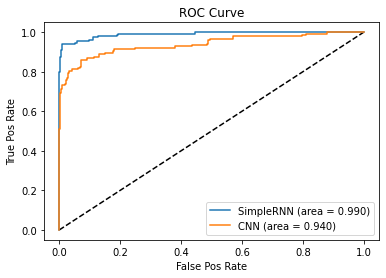

In [170]:
# Both methods seem to give us similar results.
# plotting the ROC curve for both models

plt.figure(1)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1,tpr1, label = 'SimpleRNN (area = {:.3f})'.format(auc1))
plt.plot(fpr2,tpr2, label = 'CNN (area = {:.3f})'.format(auc2))

plt.xlabel('False Pos Rate')
plt.ylabel('True Pos Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()